Строк: 50000
Колонок: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORDERID      50000 non-null  int64 
 1   BRANCH_ID    50000 non-null  object
 2   DATE_        50000 non-null  object
 3   USERID       50000 non-null  int64 
 4   NAMESURNAME  50000 non-null  object
 5   TOTALBASKET  50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


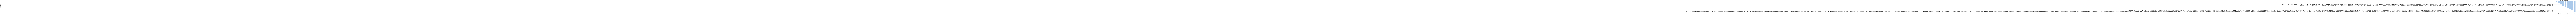

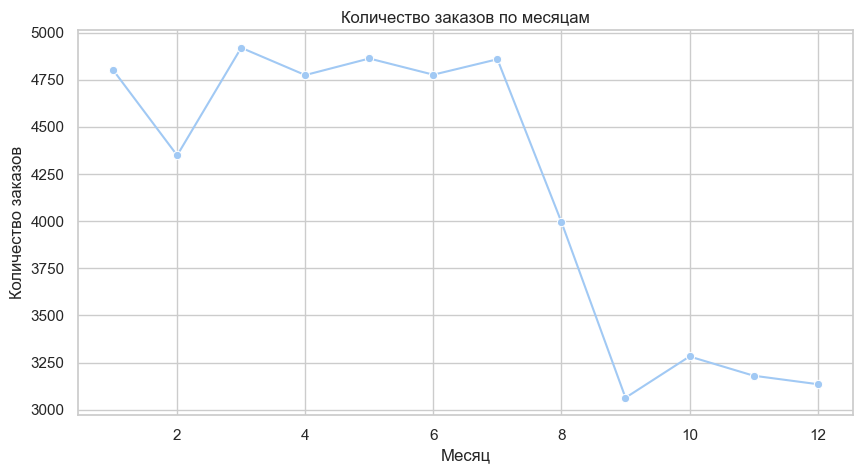

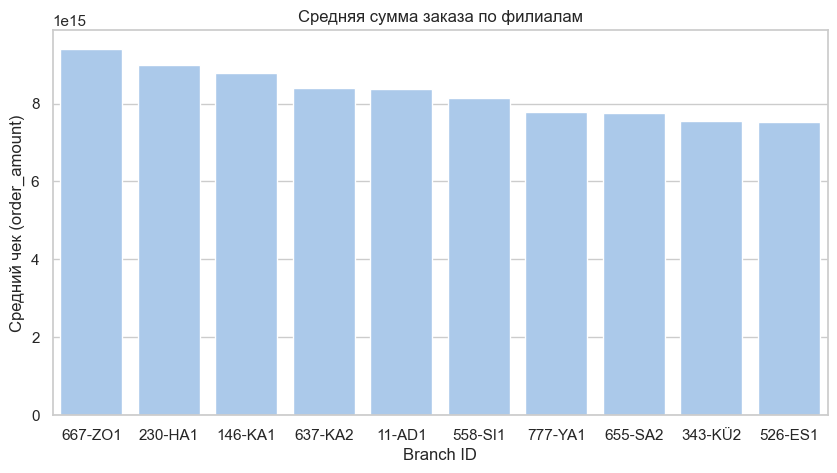

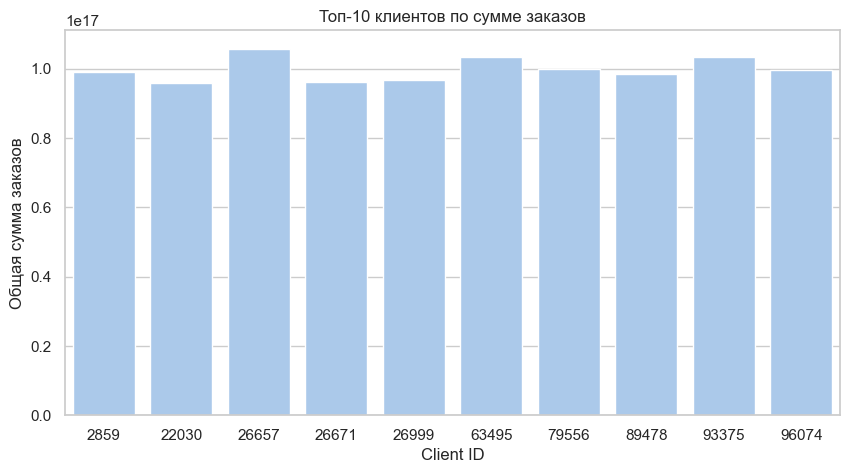

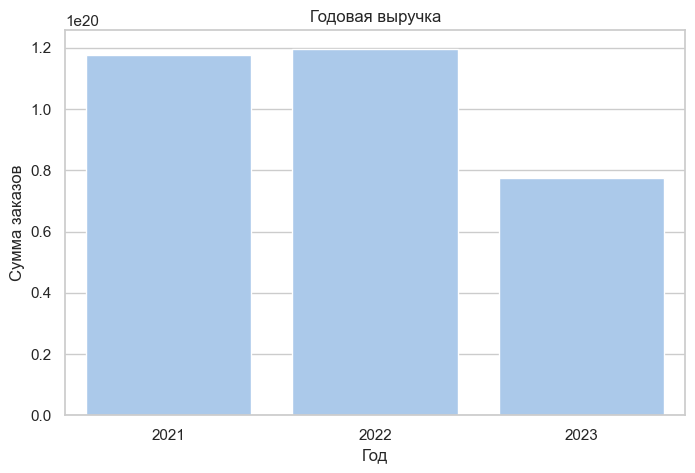

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

df = pd.read_csv('../data/Orders_sample.csv')
df.head()
print("Строк:", df.shape[0])
print("Колонок:", df.shape[1])
df.info()
df.isnull().sum()

df = df.drop_duplicates()
df['DATE_'] = pd.to_datetime(df['DATE_'], errors='coerce')
df = df.dropna(subset=['DATE_', 'TOTALBASKET'])
df.describe()

df['year'] = df['DATE_'].dt.year
df['month'] = df['DATE_'].dt.month

branch_sales = df.groupby('BRANCH_ID')['TOTALBASKET'].sum().reset_index()
branch_sales = branch_sales.sort_values(by='TOTALBASKET', ascending=False)

branch_sales.head()

plt.figure(figsize=(10,5))
sns.barplot(data=branch_sales.head(10), x='BRANCH_ID', y='TOTALBASKET')
plt.title("Топ-10 филиалов по сумме заказов")
plt.xlabel("Branch ID")
plt.ylabel("Общая сумма заказов")
plt.xticks(rotation=45)
plt.savefig('../outputs/figures/top_branch.png', dpi=300, bbox_inches='tight')
plt.show()

monthly_orders = df.groupby('month')['ORDERID'].count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_orders, x='month', y='ORDERID', marker='o')
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество заказов")
plt.grid(True)
plt.savefig('../outputs/figures/sales_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

df['TOTALBASKET'] = (
    df['TOTALBASKET']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
branch_avg = df.groupby('BRANCH_ID')['TOTALBASKET'].mean().reset_index().sort_values(by='TOTALBASKET', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=branch_avg.head(10), x='BRANCH_ID', y='TOTALBASKET')
plt.title("Средняя сумма заказа по филиалам")
plt.xlabel("Branch ID")
plt.ylabel("Средний чек (order_amount)")
plt.savefig('../outputs/figures/sales_by_branch.png', dpi=300, bbox_inches='tight')
plt.show()

client_sales = df.groupby('USERID')['TOTALBASKET'].sum().reset_index()
top_clients = client_sales.sort_values(by='TOTALBASKET', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_clients, x='USERID', y='TOTALBASKET')
plt.title("Топ-10 клиентов по сумме заказов")
plt.xlabel("Client ID")
plt.ylabel("Общая сумма заказов")
plt.savefig('../outputs/figures/top_clients.png', dpi=300, bbox_inches='tight')
plt.show()

yearly_sales = df.groupby('year')['TOTALBASKET'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_sales, x='year', y='TOTALBASKET')
plt.title("Годовая выручка")
plt.xlabel("Год")
plt.ylabel("Сумма заказов")
plt.savefig('../outputs/figures/sales_by_years.png', dpi=300, bbox_inches='tight')
plt.show()


## Main results of the analysis
- Top amount of orders are in March, May, and July.
- The highest average checks are in branches: 667-ZO1, 230-HA1, and 146-KA1.
- Top 10 buyers are: 2859, 22030, 26657, 26671, 26999, 63495, 79556, 89478, 93375, and 96074.
- The most profitable year is 2022.